In [285]:
import sys
!{sys.executable} -m pip install numpy
!{sys.executable} -m pip install matplotlib
!{sys.executable} -m pip install scipy

In [286]:
import math
import numpy as np
from math import sqrt
from numpy import asarray
from numpy.random import rand
from numpy.random import seed
from numpy import arange
from numpy import meshgrid
from matplotlib import pyplot as plt
from scipy.optimize import minimize_scalar
from matplotlib import pyplot

In [287]:
f = np.asarray([1,10])

def objective(args): # Extend any function with extend to n variables 
    return f[0]*args[0]**2 + f[1]*args[1]**2
    
# derivative of objective function
def derivative(args):
    return np.multiply(2*f, args)

# steepest descent algo.
def steepestexact(epsilon):
    # track all solutions
    solutions = list()
    # generate an initial point
    solution = np.ones(len(f))
    
    # run the gradient descent
    solution_eval = objective(solution)
    errors = []
    norm = []
    
    while solution_eval >= epsilon:
        #calculate gradient
        gradient = derivative(solution)
        res = minimize_scalar(lambda alpha: objective([solution[i] - alpha * gradient[i] for i in range(len(solution))]))
        alpha = res.x
        solution = solution - gradient*alpha
        solutions.append(solution)
        # evaluate candidate point
        solution_eval = objective(solution)
        # report progress
        errors.append(solution_eval)
        solutionlength = np.linalg.norm(solution)
        norm.append(solutionlength)
    return solutions, errors, norm
  

In [288]:
epsilon = 10**(-5)

In [289]:
solutionsexact = steepestexact(epsilon)

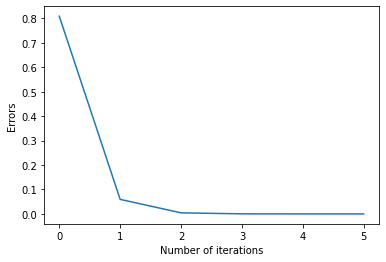

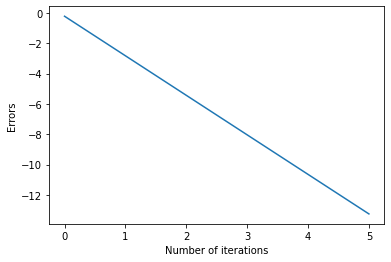

In [290]:
def plot_errors_vs_num_iterations(errors):
    plt.plot(errors)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()
def plot_lnerrors_vs_num_iterations(errors):
    lnerrors = np.log(errors)
    plt.plot(lnerrors)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()
    
plot_errors_vs_num_iterations(solutionsexact[1])
plot_lnerrors_vs_num_iterations(solutionsexact[1])

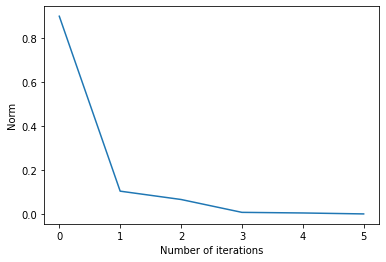

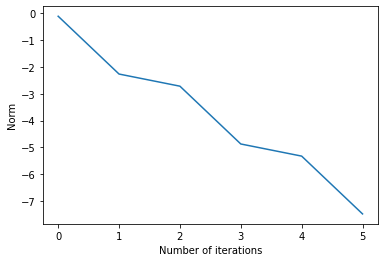

In [291]:
def plot_norm_vs_num_iterations(norm):
    plt.plot(norm)
    plt.ylabel("Norm")
    plt.xlabel("Number of iterations")
    plt.show()

def plot_lnnorm_vs_num_iterations(norm):
    lnnorm = np.log(norm)
    plt.plot(lnnorm)
    plt.ylabel("Norm")
    plt.xlabel("Number of iterations")
    plt.show()

plot_norm_vs_num_iterations(solutionsexact[2])
plot_lnnorm_vs_num_iterations(solutionsexact[2])

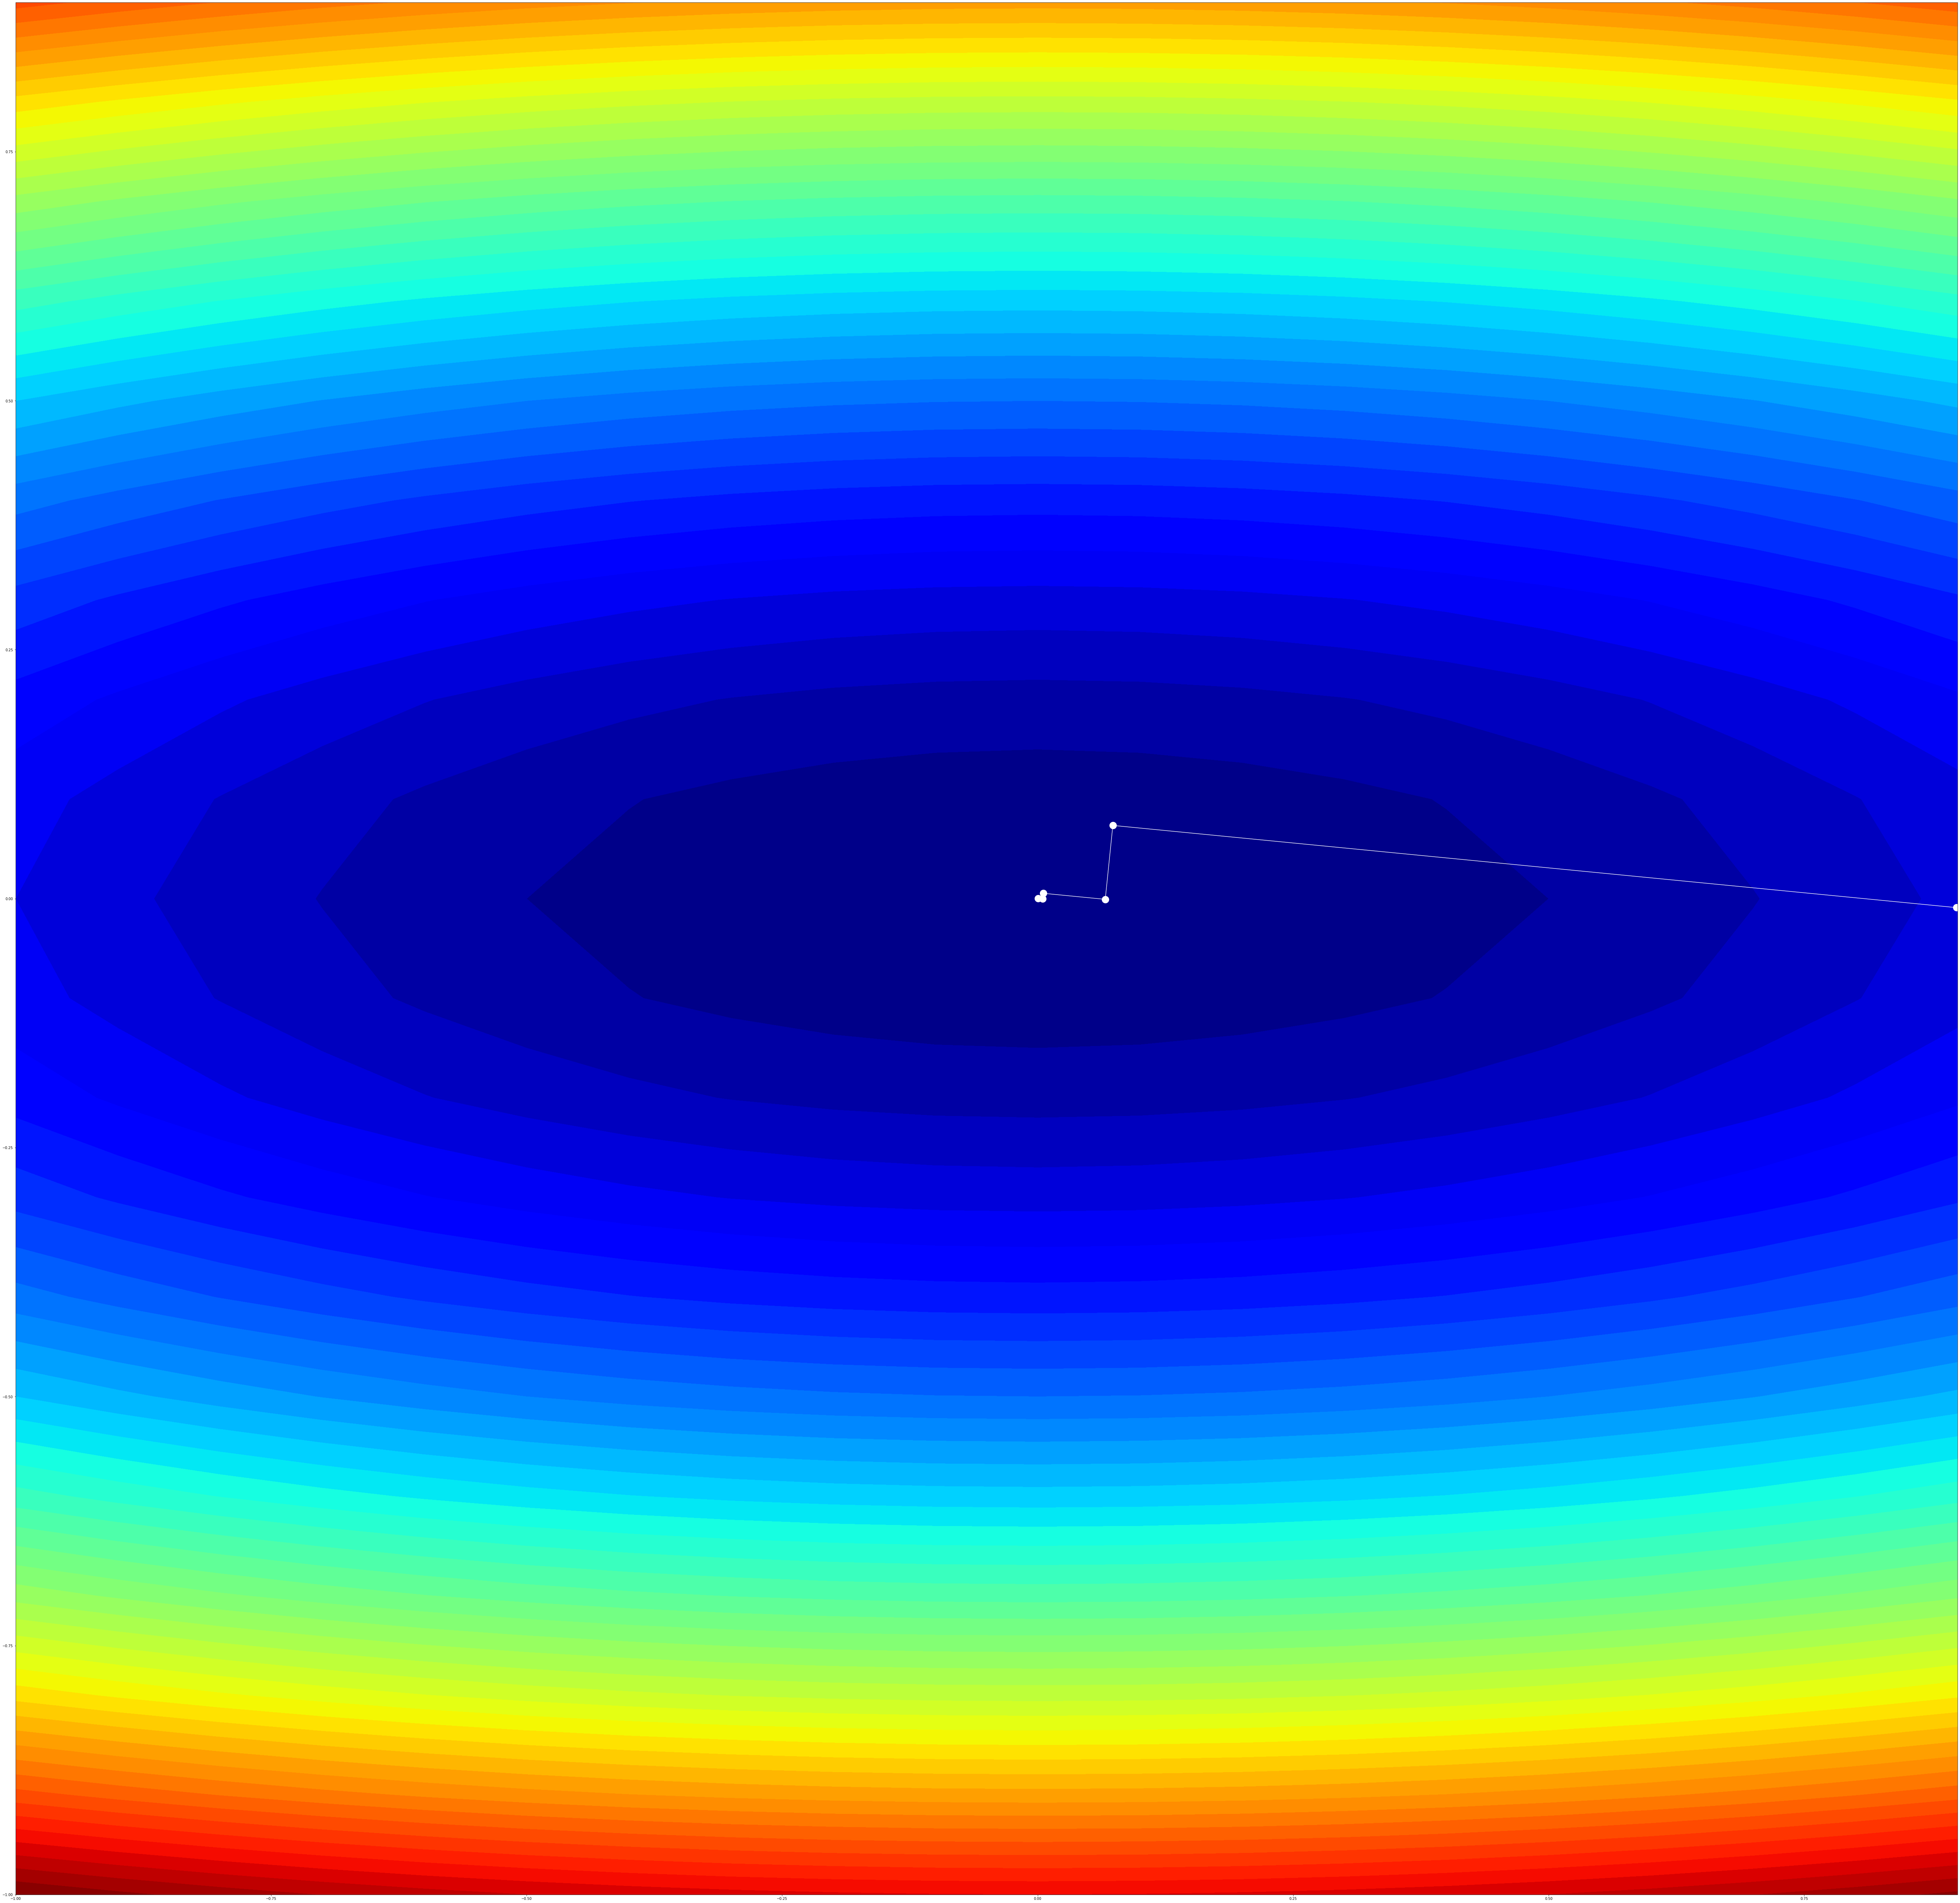

In [292]:
plt.figure(figsize=(100,100))

# define range for input
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
results = objective([x,y])
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample
xs = [arr[0] for arr in solutionsexact[0]]
ys = [arr[1] for arr in solutionsexact[0]]
pyplot.plot(xs, ys, marker='o', color='w', markersize=20)
# show the plot

In [293]:
f = np.asarray([1,10])

def objective(args): # Extend any function with extend to n variables 
    return f[0]*args[0]**2 + f[1]*args[1]**2
    
# derivative of objective function
def derivative(args):
    return np.multiply(2*f, args)

# steepest descent algo.
def steepestbA(epsilon, tau, beta):
    # track all solutions
    solutions = list()
    # generate an initial point
    solution = np.ones(len(f))
    # run the gradient descent
    solution_eval = objective(solution)
    
    errors = []
    norm = []
    
    while solution_eval >= epsilon:
        alpha = 1
        #calculate gradient
        gradient = derivative(solution)
        newsolution = solution - alpha*gradient
        a = beta * alpha * np.dot(gradient, gradient)
        k = objective(solution) - a
        
        while objective(newsolution) > k:
            alpha = tau*alpha
            newsolution = solution - alpha*gradient
            a = beta * alpha * np.dot(gradient, gradient)
            k = objective(solution) - a
            
            
        solution = solution - alpha*gradient
        solutions.append(solution)
        # evaluate candidate point
        solution_eval = objective(solution)
        # report progress
        errors.append(solution_eval)
        solutionlength = np.linalg.norm(solution)
        norm.append(solutionlength)
    return solutions, errors, norm
  

In [297]:
epsilon = 10**(-5)

In [298]:
tau = 0.5
beta = 0.01

In [299]:
solutionsbA = steepestbA(epsilon, tau, beta)

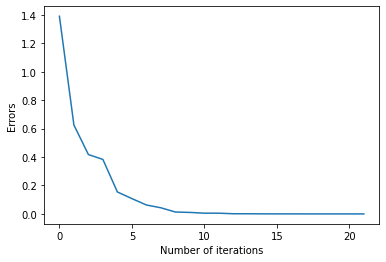

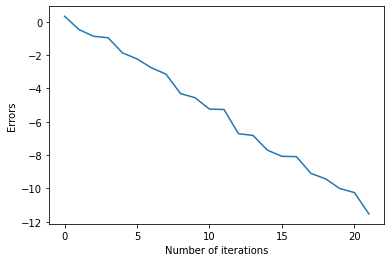

In [300]:
def plot_errors_vs_num_iterations(errors):
    plt.plot(errors)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()
def plot_lnerrors_vs_num_iterations(errors):
    lnerrors = np.log(errors)
    plt.plot(lnerrors)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()
    
plot_errors_vs_num_iterations(solutionsbA[1])
plot_lnerrors_vs_num_iterations(solutionsbA[1])

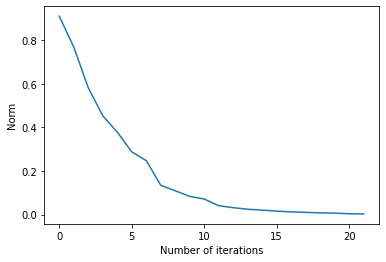

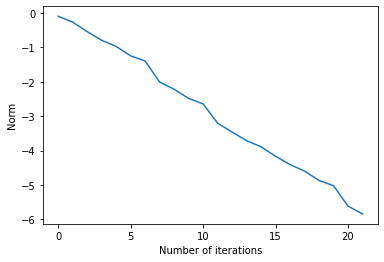

In [301]:
def plot_norm_vs_num_iterations(norm):
    plt.plot(norm)
    plt.ylabel("Norm")
    plt.xlabel("Number of iterations")
    plt.show()

def plot_lnnorm_vs_num_iterations(norm):
    lnnorm = np.log(norm)
    plt.plot(lnnorm)
    plt.ylabel("Norm")
    plt.xlabel("Number of iterations")
    plt.show()

plot_norm_vs_num_iterations(solutionsbA[2])
plot_lnnorm_vs_num_iterations(solutionsbA[2])

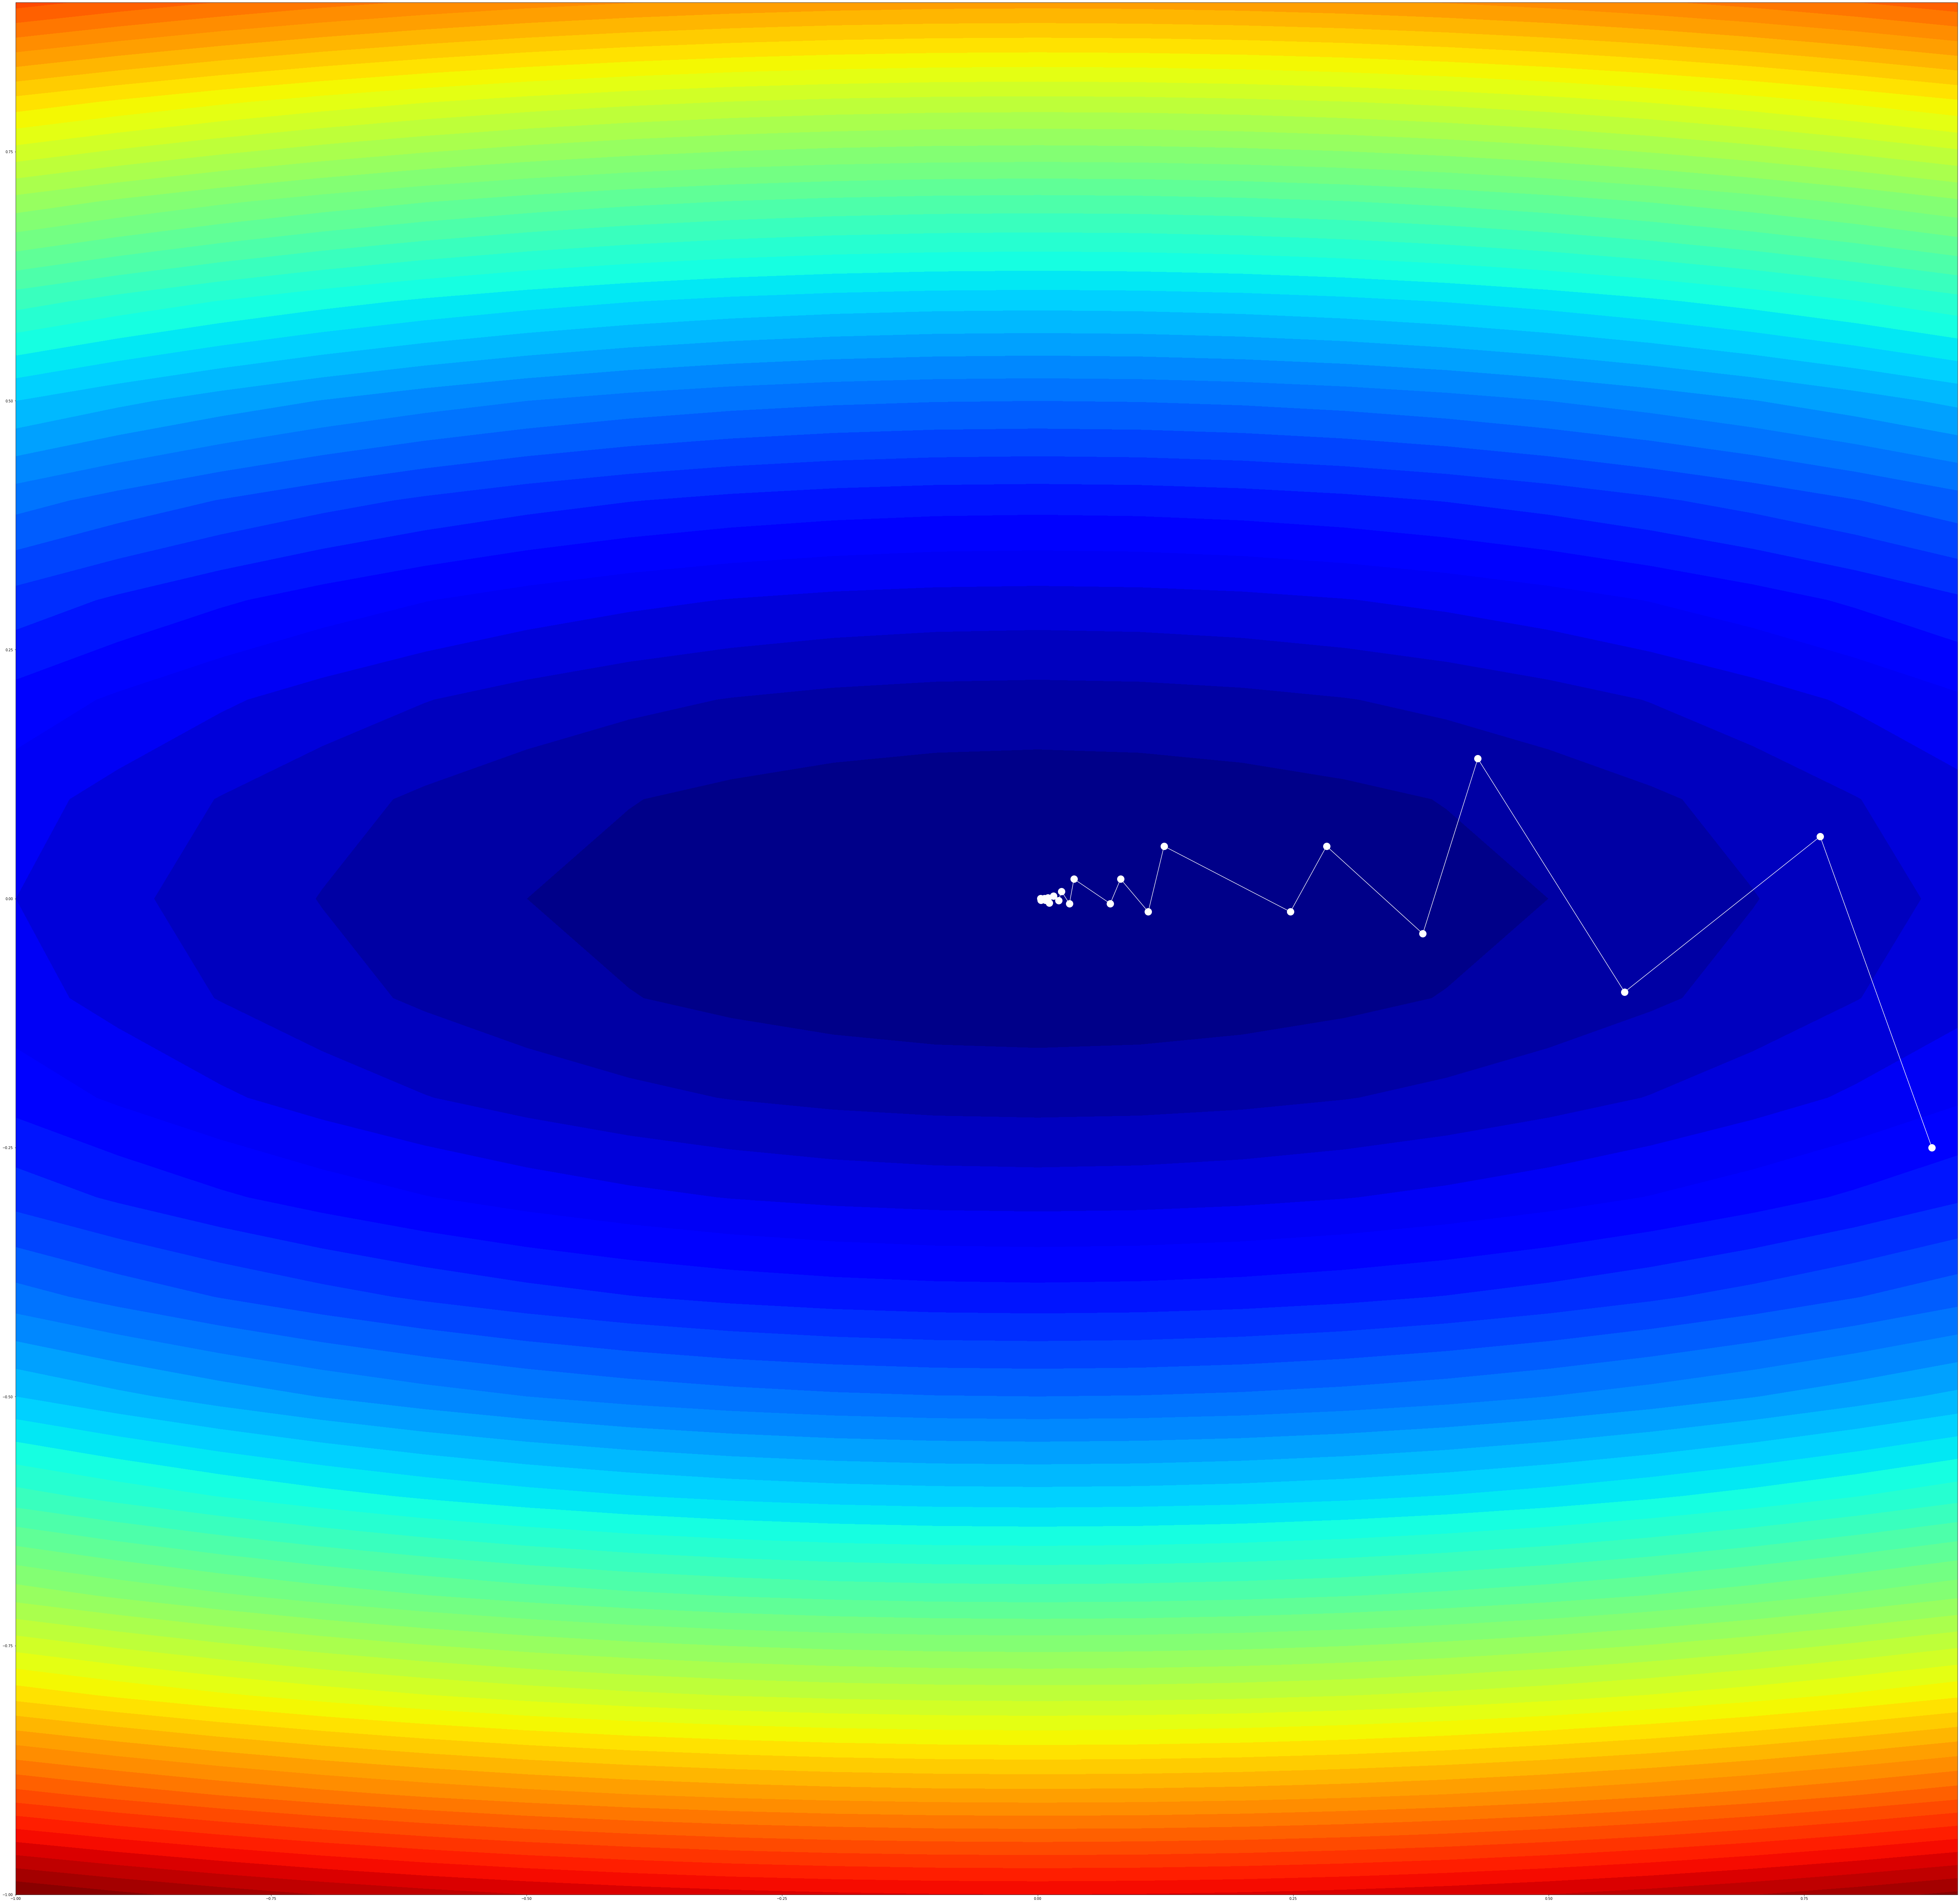

In [302]:
plt.figure(figsize=(100,100))

# define range for input
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
results = objective([x, y])
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample
xs = [arr[0] for arr in solutionsbA[0]]
ys = [arr[1] for arr in solutionsbA[0]]
pyplot.plot(xs, ys, marker='o', color='w', markersize=20)
# show the plot

In [303]:
f = np.asarray([1,10])

def objective(args): # Extend any function with extend to n variables 
    return f[0]*args[0]**2 + f[1]*args[1]**2
    
# derivative of objective function
def derivative(args):
    return np.multiply(2*f, args)

# steepest descent algo.
def steepestfix(epsilon, weight):
    # track all solutions
    solutions = list()
    # generate an initial point
    solution = np.ones(len(f))
    
    # run the gradient descent
    solution_eval = objective(solution)
    
    errors = []
    norm = []
    
    while solution_eval >= epsilon:
        #calculate gradient
        gradient = derivative(solution)
        solution = solution - gradient*weight
        solutions.append(solution)
        # evaluate candidate point
        solution_eval = objective(solution)
        # report progress
        errors.append(solution_eval)
        solutionlength = np.linalg.norm(solution)
        norm.append(solutionlength)
    return solutions, errors, norm

In [305]:
weight = 0.005
epsilon = 0.1

In [306]:
solutionsfix = steepestfix(epsilon, weight)

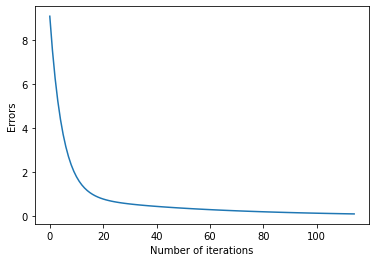

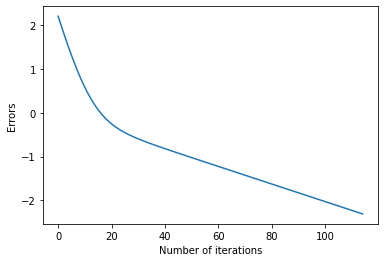

In [307]:
def plot_errors_vs_num_iterations(errors):
    plt.plot(errors)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()

def plot_lnerrors_vs_num_iterations(errors):
    lnerrors = np.log(errors)
    plt.plot(lnerrors)
    plt.ylabel("Errors")
    plt.xlabel("Number of iterations")
    plt.show()
    
plot_errors_vs_num_iterations(solutionsfix[1])
plot_lnerrors_vs_num_iterations(solutionsfix[1])

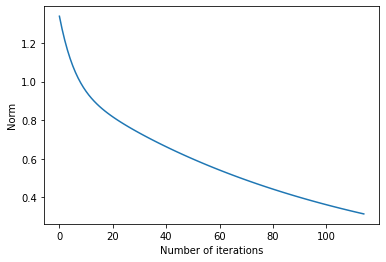

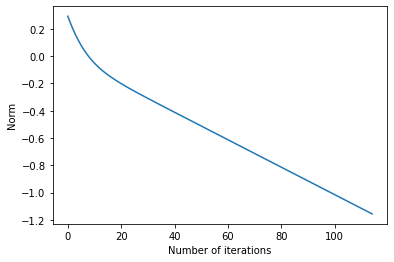

In [308]:
def plot_norm_vs_num_iterations(norm):
    plt.plot(norm)
    plt.ylabel("Norm")
    plt.xlabel("Number of iterations")
    plt.show()

def plot_lnnorm_vs_num_iterations(norm):
    lnnorm = np.log(norm)
    plt.plot(lnnorm)
    plt.ylabel("Norm")
    plt.xlabel("Number of iterations")
    plt.show()

plot_norm_vs_num_iterations(solutionsfix[2])
plot_lnnorm_vs_num_iterations(solutionsfix[2])

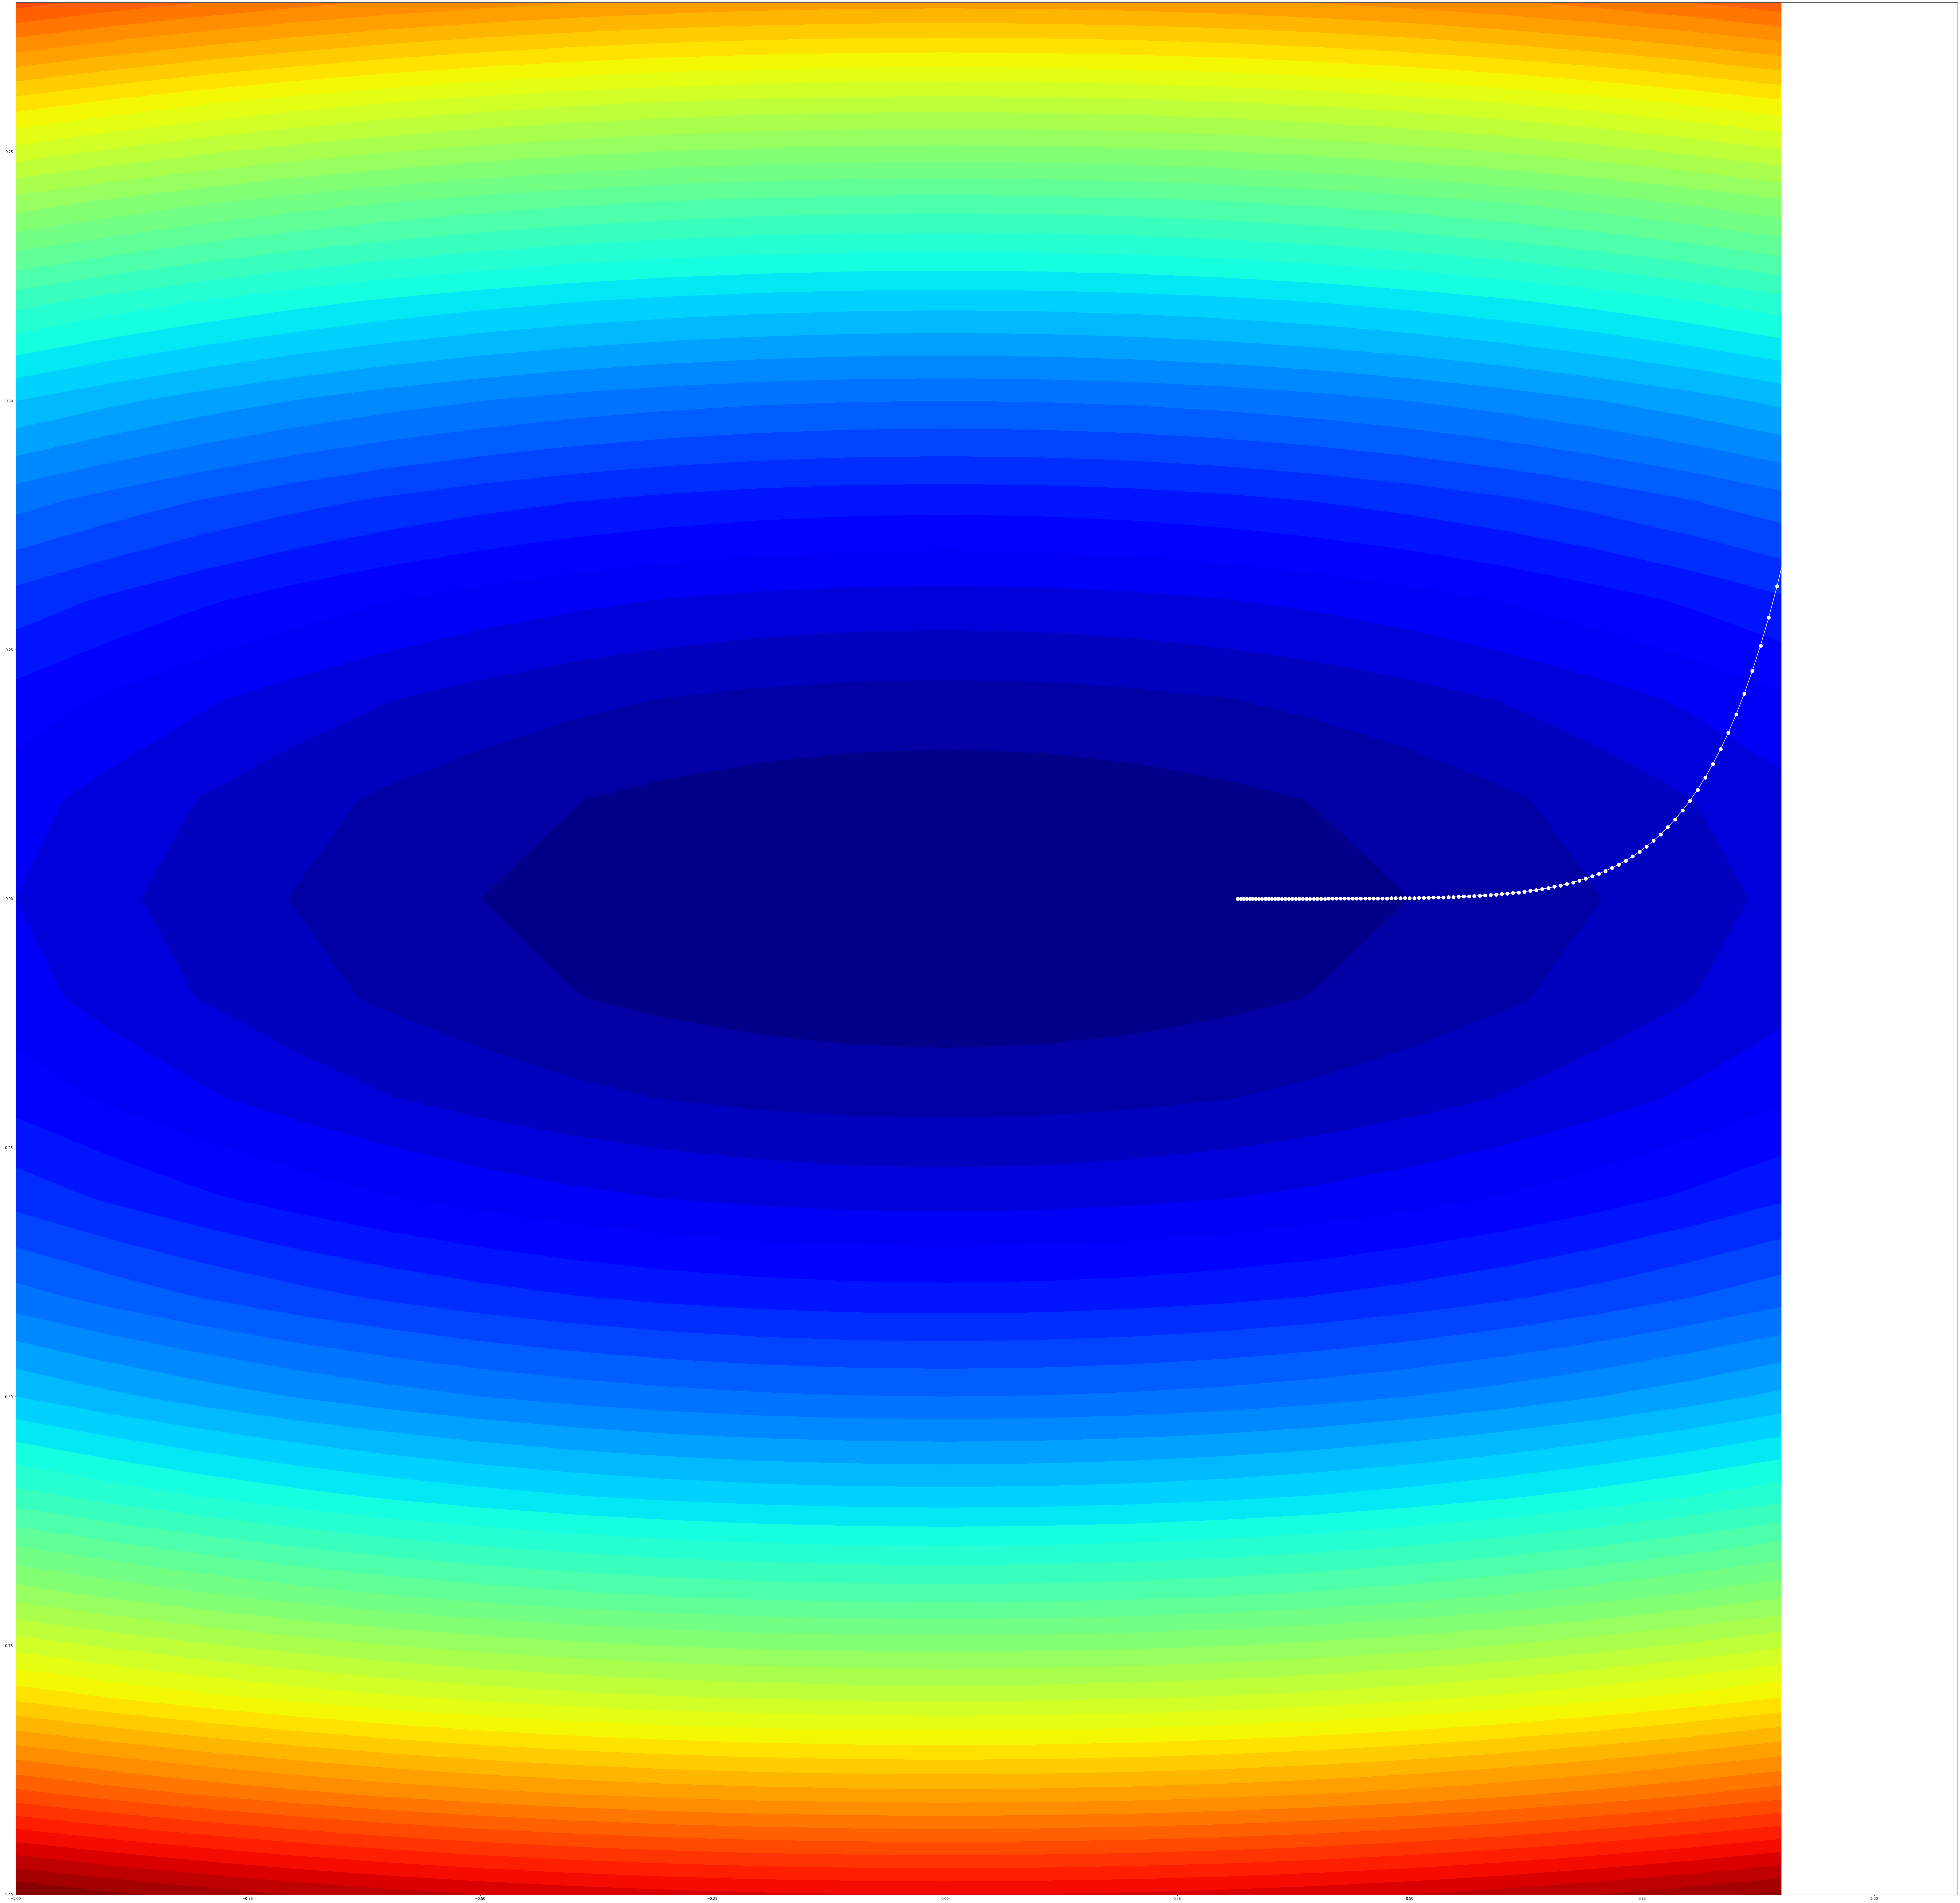

In [309]:
plt.figure(figsize=(100,100))

# define range for input
bounds = np.asarray([[-1.0, 1.0], [-1.0, 1.0]])
# sample input range uniformly at 0.1 increments
xaxis = arange(bounds[0,0], bounds[0,1], 0.1)
yaxis = arange(bounds[1,0], bounds[1,1], 0.1)
# create a mesh from the axis
x, y = meshgrid(xaxis, yaxis)
results = objective([x, y])
# create a filled contour plot with 50 levels and jet color scheme
pyplot.contourf(x, y, results, levels=50, cmap='jet')
# plot the sample
xs = [arr[0] for arr in solutionsfix[0]]
ys = [arr[1] for arr in solutionsfix[0]]
pyplot.plot(xs, ys, marker='o', color='w', markersize=10)
# show the plot